In [3]:
import pandas as pd
import seaborn as sns
import pdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv(r"C:\Users\Oscar_On\Downloads\games.csv")

In [5]:
meta = pd.read_json(r"C:\Users\Oscar_On\Downloads\games_metadata.json", lines=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [7]:
df.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [8]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50503 non-null  int64 
 1   description  50503 non-null  object
 2   tags         50503 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df = df.merge(meta, on='app_id')


In [10]:
df.drop('description', axis = 1)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50498,2432010,The Stranded Traveler,2023-06-16,True,False,False,Positive,80,26,0.00,0.00,0.0,True,"[Adventure, Action, Action-Adventure, Platform..."
50499,668600,Pixelum,2020-10-01,True,False,False,Mixed,41,58,0.00,0.00,0.0,True,"[RPG, Adventure, Simulation, Indie, Early Acce..."
50500,2071510,Goblin Rules Football,2022-10-20,True,True,True,Mostly Positive,72,11,0.00,0.00,0.0,True,"[Sports, Arcade, 2D, Football (American), Team..."
50501,2446220,World of Tanks Blitz - Welcome Bundle,2023-05-25,True,True,False,Mixed,63,199,0.00,0.00,0.0,True,"[Action, Free to Play, Massively Multiplayer]"


In [11]:
df.isnull().sum(axis=1).sum()

0

In [12]:
df.drop_duplicates(subset=['app_id', 'title', 'date_release', 'win', 'mac', 'linux',
                             'rating', 'positive_ratio', 'user_reviews', 'price_final',
                             'price_original', 'discount', 'steam_deck'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  description     50503 non-null  object 
 14  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.4+ MB


In [13]:
df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.050300e+04,50503.000000,5.050300e+04,50503.000000,50503.000000,50503.000000
mean,1.048405e+06,77.033622,1.776163e+03,8.549623,9.166772,5.716254
std,6.058853e+05,18.261259,3.912721e+04,11.468167,11.917905,18.779479
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.265205e+05,67.000000,1.900000e+01,0.990000,1.990000,0.000000
50%,9.793100e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.514985e+06,91.000000,2.040000e+02,10.990000,12.990000,0.000000
max,2.488153e+06,100.000000,7.297791e+06,299.990000,299.990000,90.000000


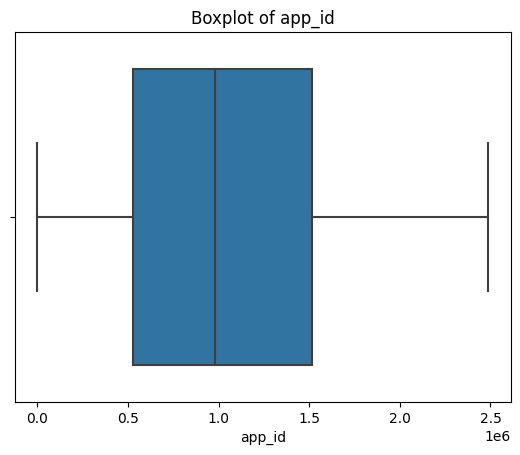

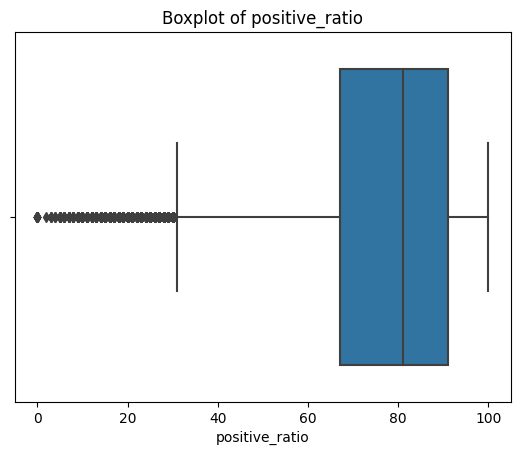

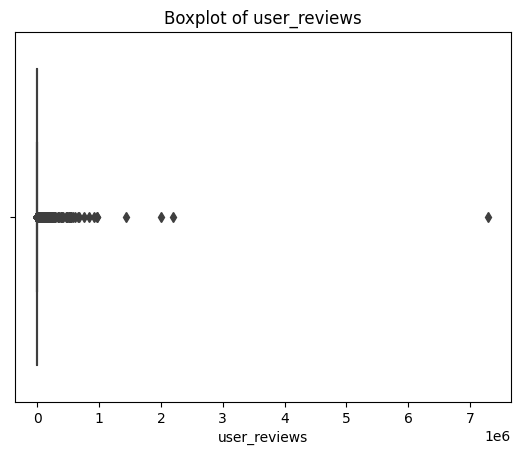

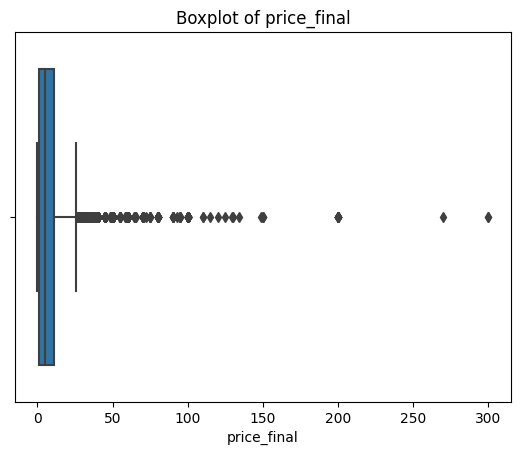

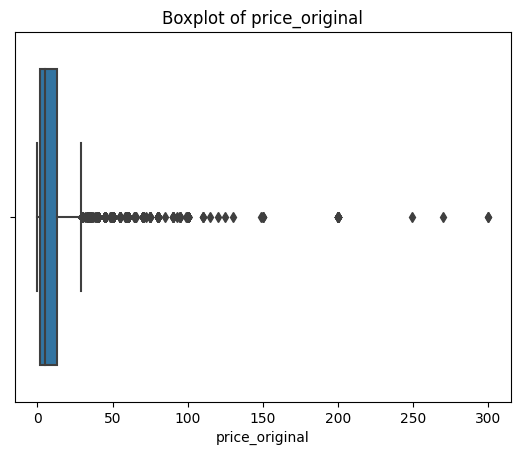

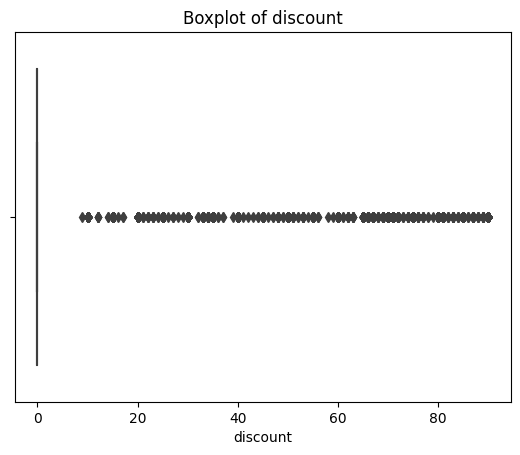

In [15]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [18]:
df = df.drop(df[df['user_reviews'] > 1000000].index)

df = df.drop(df[df['price_final'] > 50].index)

df = df.drop(df[df['price_original'] > 50].index)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49963 entries, 0 to 50502
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          49963 non-null  int64  
 1   title           49963 non-null  object 
 2   date_release    49963 non-null  object 
 3   win             49963 non-null  bool   
 4   mac             49963 non-null  bool   
 5   linux           49963 non-null  bool   
 6   rating          49963 non-null  object 
 7   positive_ratio  49963 non-null  int64  
 8   user_reviews    49963 non-null  int64  
 9   price_final     49963 non-null  float64
 10  price_original  49963 non-null  float64
 11  discount        49963 non-null  float64
 12  steam_deck      49963 non-null  bool   
 13  description     49963 non-null  object 
 14  tags            49963 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.8+ MB


In [20]:
49963/50503

0.989307565887175